In [2]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
import pandas as pd
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
#%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_excel("Superstore.xls")
furn = df.loc[df['Category'] == 'Furniture']
furn.columns
furn['Order Date'].min(), furn['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [5]:
furn.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
furn.drop(cols, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
furn = furn.sort_values('Order Date')
furn.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
furn.tail()

,Order Date,Sales
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980
906,2017-12-30,323.136


In [9]:
furn = furn.groupby('Order Date')['Sales'].sum().reset_index()
furn.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [10]:
furn = furn.set_index('Order Date')
furn.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [11]:
y = furn['Sales'].resample('MS').mean()
y['2016':]

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

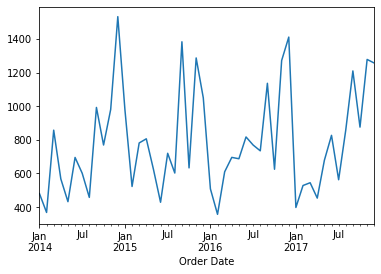

In [12]:
y.plot() #Here we can see seasonality pattern in each year as first sales are low in the begining of each year and then they go high at ]
#the end of the year.

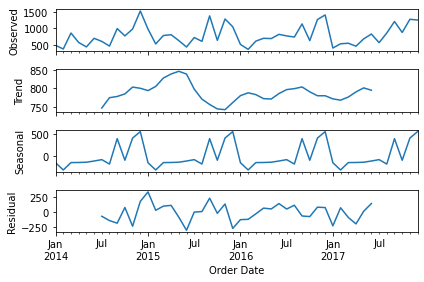

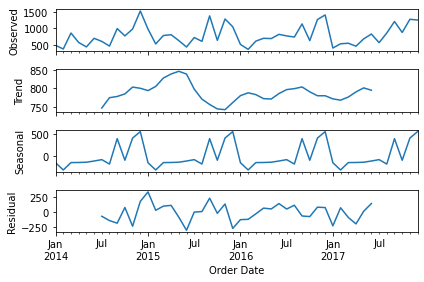

In [13]:
from pylab import rcParams
dc =sm.tsa.seasonal_decompose(y, model = 'additive')
dc.plot()

In [14]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
s_pdq = [(x[0], x[1], x[2], 12) for x in pdq]


In [15]:
for param in pdq:
  for s_param in s_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y,order=param, seaosnal_order = s_param, enforce_stationarity=False, enforce_invertibility = False) 
      results =mod.fit()
      print('ARIMA {} x {} - AIC: {}'.format(param, s_param, results.aic))
    except:
      continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (0, 0, 1, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (0, 1, 0, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (0, 1, 1, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (1, 0, 0, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (1, 0, 1, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (1, 1, 0, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (1, 1, 1, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 1) x (0, 0, 0, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (0, 0, 1, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (0, 1, 0, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (0, 1, 1, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (1, 0, 0, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (1, 0, 1, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (1, 1, 0, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (1, 1, 1, 12) - AIC: 720.9252270758096
ARIMA (0, 1, 0) x (0, 0, 0, 12) - AIC: 677.8947668259312
ARIMA (0, 1, 0) x (0, 0, 1, 12)

In [16]:
model  = sm.tsa.statespace.SARIMAX(y, order = (1,1,1), seasonal_order=(1,1,0,12),enforce_stationarity= False, enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


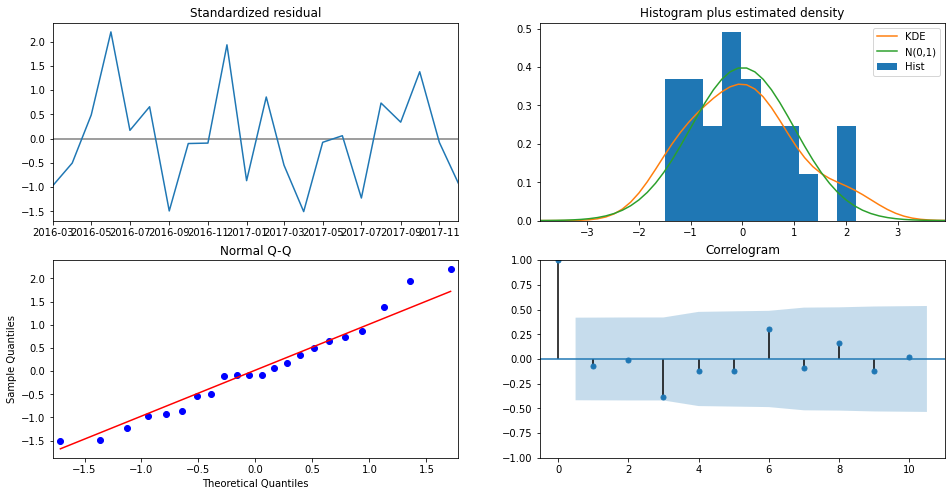

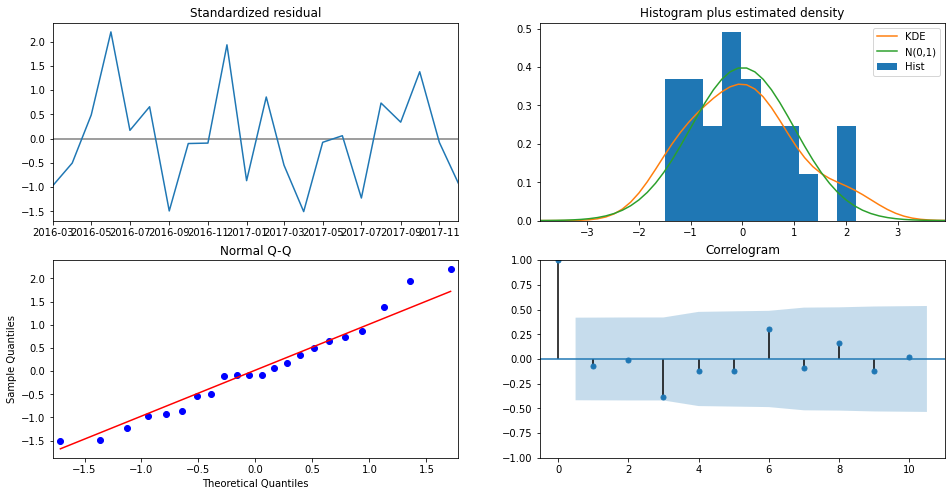

In [17]:
results.plot_diagnostics(figsize = (16,8))

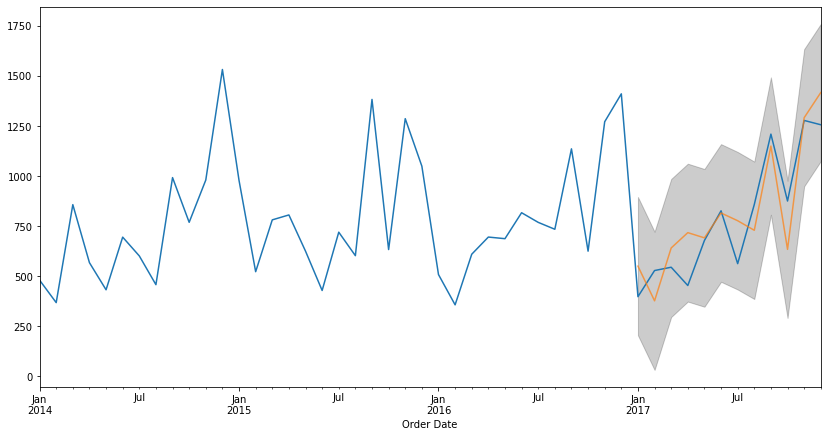

In [18]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label = 'one step ahead of forecast', alpha = 0.7, figsize = (14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = 'k', alpha = 0.2)

In [19]:
y_forecasted = pred.predicted_mean
y_ori = y['2017-01-01':]
mse  = ((y_forecasted - y_ori) ** 2).mean()
print("rmse is : ", np.sqrt(mse))

rmse is :  151.6363270022125


Text(0, 0.5, 'Furniture_sales')

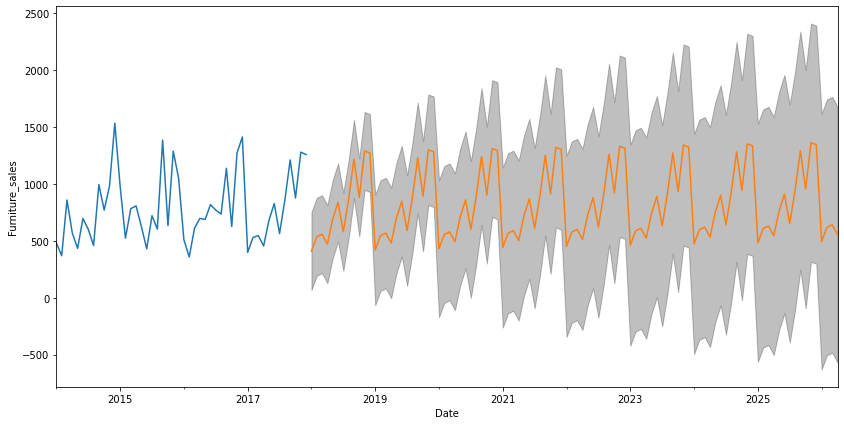

In [20]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax  = y.plot(label = 'observed' , figsize= (14, 7))
pred_uc.predicted_mean.plot(ax =ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:, 1], color  ='k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture_sales')


In [21]:
off = df.loc[df['Category'] == 'Office Supplies']
furni = df.loc[df['Category'] == 'Furniture']
furni.shape, off.shape



((2121, 21), (6026, 21))

In [22]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furni.drop(cols, axis=1, inplace=True)
off.drop(cols, axis=1, inplace=True)
off.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900


In [23]:
furni.sort_values('Order Date')
off.sort_values('Order Date')
furni = furni.groupby('Order Date')['Sales'].sum().reset_index()
off = off.groupby('Order Date')['Sales'].sum().reset_index()

furni = furni.set_index('Order Date')
off = off.set_index('Order Date')

y_furni = furni['Sales'].resample('MS').mean()
y_off = off['Sales'].resample('MS').mean()

furni = pd.DataFrame({'Order Date': y_furni.index, 'Sales': y_furni.values})
off = pd.DataFrame({'Order Date': y_off.index, 'Sales': y_off.values})

store = furni.merge(off, how='inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'furni_sales', 'Sales_y': 'off_sales'}, inplace = True)
store.head()


,Order Date,furni_sales,off_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


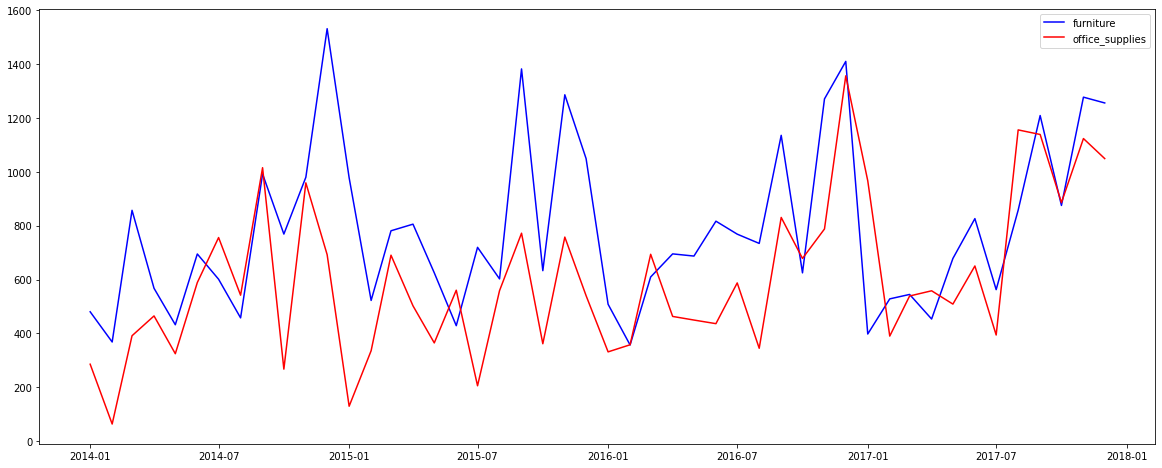

In [24]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furni_sales'], 'b-', label = 'furniture' )
plt.plot(store['Order Date'], store['off_sales'], 'r-', label = 'office_supplies')
plt.legend()

In [25]:
first_date  = store.loc[np.min(list(np.where(store['off_sales'] > store['furni_sales'])[0])), 'Order Date']
first_date 

Timestamp('2014-07-01 00:00:00')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,535.372051,285.245302,784.240060
1,2014-02-01,451.116320,197.766081,681.391471
2,2014-03-01,706.401580,477.226300,948.642878
3,2014-04-01,630.086487,395.107000,866.407956
4,2014-05-01,570.801960,319.855142,798.569548


<Figure size 1152x576 with 0 Axes>

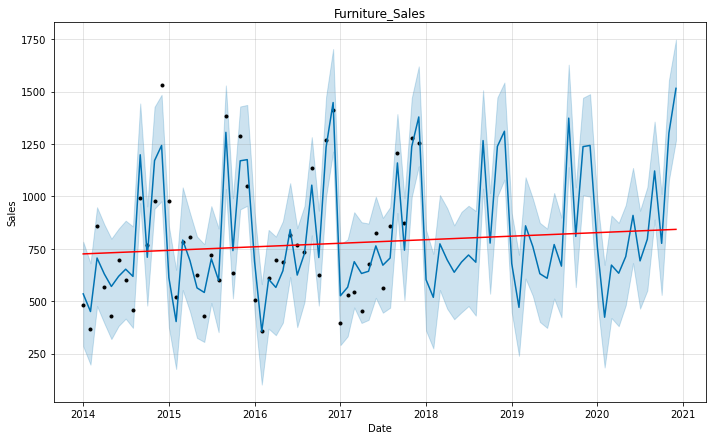

In [26]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

furni = furni.rename(columns = {'Order Date': 'ds', 'Sales': 'y'})
furni_model = Prophet(interval_width = 0.95)
furni_model.fit(furni)


off = off.rename(columns = {'Order Date'	: 'ds', 'Sales': 'y'})
off_model = Prophet(interval_width = 0.95)
off_model.fit(off)

furni_fc = furni_model.make_future_dataframe(periods=36, freq = 'MS')
furni_fc = furni_model.predict(furni_fc)

off_fc = off_model.make_future_dataframe(periods=36, freq= 'MS')
off_fc = off_model.predict(off_fc)

plt.figure(figsize = (16, 8 ))
fig  = furni_model.plot(furni_fc, xlabel = 'Date', ylabel= 'Sales')
plt.title('Furniture_Sales')
a = add_changepoints_to_plot(fig.gca(), furni_model, furni_fc)


furni_fc[['ds','yhat','yhat_lower','yhat_upper']].head()

<Figure size 1152x576 with 0 Axes>

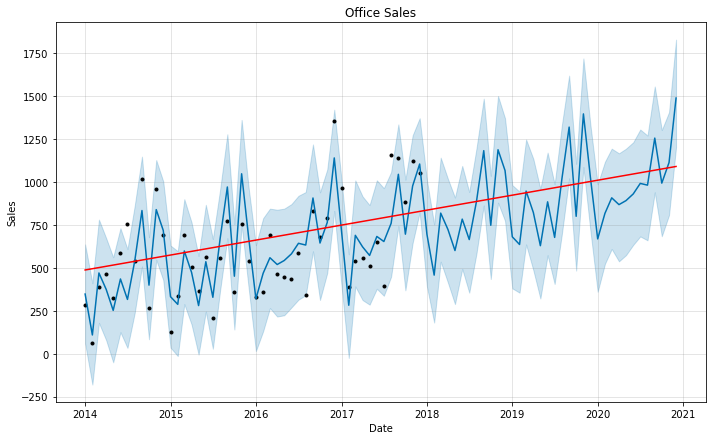

In [27]:
plt.figure(figsize = (16, 8))
fig1 = off_model.plot(off_fc, xlabel= 'Date', ylabel='Sales')
plt.title('Office Sales')
a = add_changepoints_to_plot(fig1.gca(), off_model, off_fc)

In [30]:
furni_n = ['furni_%s' % column for column in furni_fc.columns]
off_n = ['off_%s' % column for column in off_fc.columns]

In [31]:
merge_ffc = furni_fc.copy()
merge_ofc = off_fc.copy()

merge_ffc.columns = furni_n
merge_ofc.columns = off_n

forecast = pd.merge(merge_ffc, merge_ofc, how = 'inner', left_on = 'furni_ds', right_on = 'off_ds')

forecast = forecast.rename(columns = {'furni_ds': 'Date'}).drop('off_ds', axis =1)
forecast.head()

,Date,furni_trend,furni_yhat_lower,furni_yhat_upper,furni_trend_lower,furni_trend_upper,furni_additive_terms,furni_additive_terms_lower,furni_additive_terms_upper,furni_yearly,...,off_additive_terms,off_additive_terms_lower,off_additive_terms_upper,off_yearly,off_yearly_lower,off_yearly_upper,off_multiplicative_terms,off_multiplicative_terms_lower,off_multiplicative_terms_upper,off_yhat
0,2014-01-01,726.057713,285.245302,784.240060,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,197.766081,681.391471,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,477.226300,948.642878,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,395.107000,866.407956,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,319.855142,798.569548,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


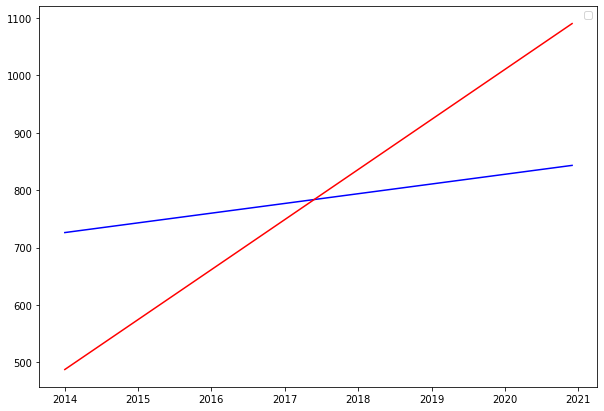

In [33]:
#Trend and Forecast Visualization
plt.figure(figsize = (10,7))
plt.plot (forecast['Date'], forecast['furni_trend'], 'b-',)
plt.plot(forecast['Date'], forecast['off_trend'], 'r-')
plt.legend()


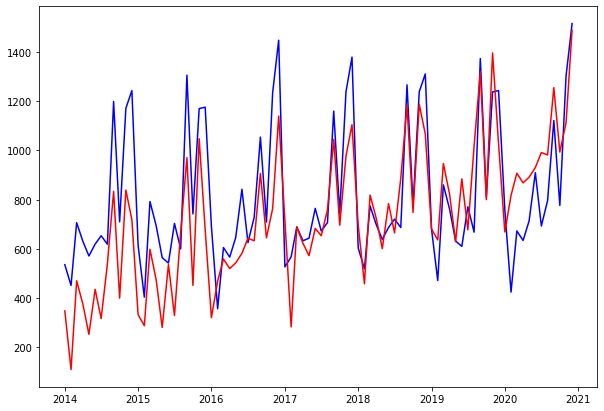

In [34]:
plt.figure(figsize = (10,7))
plt.plot(forecast ['Date'], forecast['furni_yhat'], 'b-' )
plt.plot(forecast['Date'], forecast['off_yhat'], 'r-')

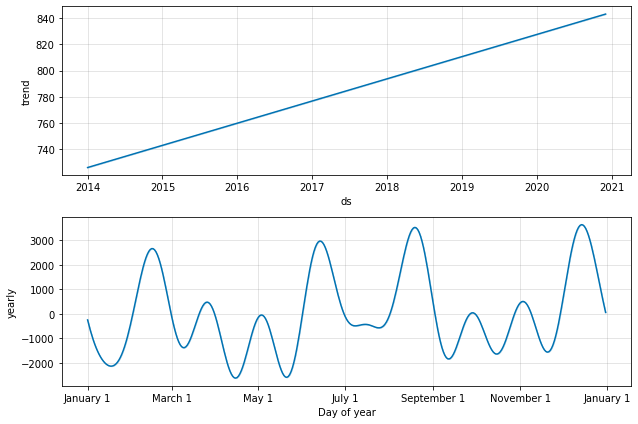

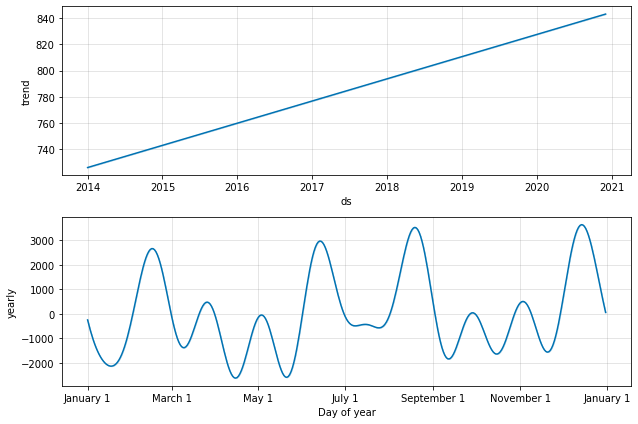

In [36]:
furni_model.plot_components(furni_fc)

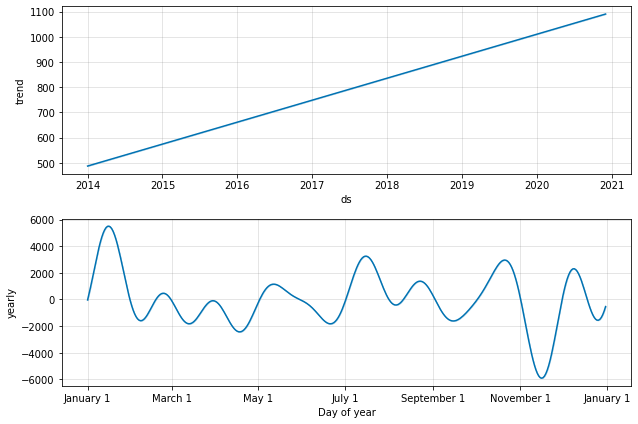

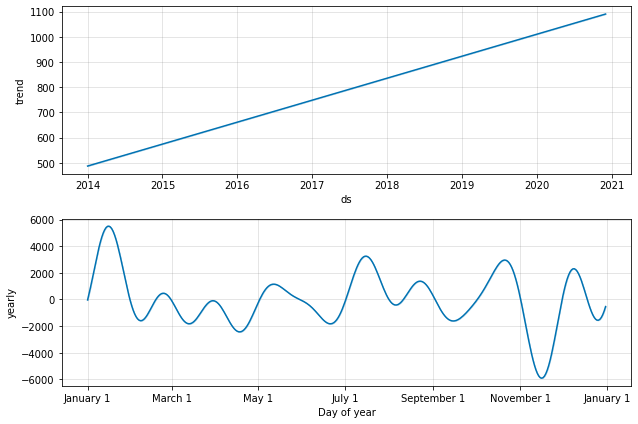

In [37]:
off_model.plot_components(off_fc)